In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [2]:
url = "https://raw.githubusercontent.com/Inhusa/AI-class/refs/heads/main/6%20week/diabetes.csv"
data = pd.read_csv(url)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
data = data.drop(columns=['Outcome'])
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
X = data.drop('BMI', axis=1).values
y = data['BMI'].values.astype(np.float32)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ..., -0.69289057,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.69289057,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -0.69289057,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ...,  0.27959377,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.69289057,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.69289057,
        -0.47378505, -0.87137393]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# TensorDataset으로 래핑
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # y를 2D 텐서로 변환
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  # y를 2D 텐서로 변환

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)
y_test_tensor.shape

torch.Size([231, 1])

In [11]:
class diabetesDense(nn.Module):
    def __init__(self):
        super(diabetesDense, self).__init__()
        self.fc1 = nn.Linear(7, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = diabetesDense().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [12]:
model.train()
train_losses = []
epochs = 60
for epoch in range(epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss / len(train_loader))
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader):.4f}")

Epoch 1, Loss: 1069.3750
Epoch 2, Loss: 1048.5071
Epoch 3, Loss: 1010.0367
Epoch 4, Loss: 926.5181
Epoch 5, Loss: 765.8299
Epoch 6, Loss: 523.6655
Epoch 7, Loss: 280.3748
Epoch 8, Loss: 166.3388
Epoch 9, Loss: 127.5506
Epoch 10, Loss: 106.5131
Epoch 11, Loss: 94.2983
Epoch 12, Loss: 86.0613
Epoch 13, Loss: 80.1060
Epoch 14, Loss: 76.2533
Epoch 15, Loss: 72.6647
Epoch 16, Loss: 70.1927
Epoch 17, Loss: 67.2399
Epoch 18, Loss: 65.1870
Epoch 19, Loss: 62.6529
Epoch 20, Loss: 61.4298
Epoch 21, Loss: 60.0530
Epoch 22, Loss: 58.6084
Epoch 23, Loss: 57.6340
Epoch 24, Loss: 55.8817
Epoch 25, Loss: 54.9999
Epoch 26, Loss: 54.4286
Epoch 27, Loss: 53.2579
Epoch 28, Loss: 52.9534
Epoch 29, Loss: 51.3110
Epoch 30, Loss: 51.8210
Epoch 31, Loss: 49.7876
Epoch 32, Loss: 48.7394
Epoch 33, Loss: 48.3566
Epoch 34, Loss: 48.1451
Epoch 35, Loss: 47.1363
Epoch 36, Loss: 46.1905
Epoch 37, Loss: 45.7526
Epoch 38, Loss: 45.0030
Epoch 39, Loss: 45.7248
Epoch 40, Loss: 43.8595
Epoch 41, Loss: 43.6312
Epoch 42, Lo

In [13]:
# 평가
model.eval()
preds, actuals = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch).cpu().numpy()
        preds.extend(outputs)
        actuals.extend(y_batch.numpy())

mse = mean_squared_error(actuals, preds)
r2_score = r2_score(actuals, preds)
print(f"R^2 Score: {r2_score:.4f}")
print(f"Test MSE: {mse:.4f}")


R^2 Score: 0.2130
Test MSE: 56.2742


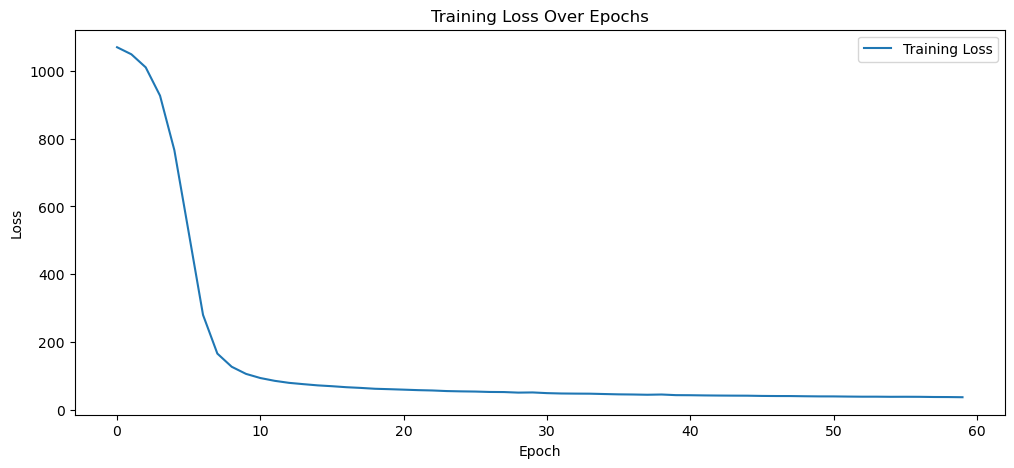

In [14]:
import matplotlib.pyplot as plt
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
